In [74]:
import pandas as pd

# Load the CSV data
data = pd.read_csv('../data/AquaForecast_sales.csv', parse_dates=['date'])

# Check first rows
data.head()


,date,product,sales_quantity
0,2022-01-02,Salmon Fillet,204
1,2022-01-09,Salmon Fillet,204
2,2022-01-16,Salmon Fillet,218
3,2022-01-23,Salmon Fillet,232
4,2022-01-30,Salmon Fillet,220


In [75]:
# Data summary
print(data.info())
print(data.describe())

# Check missing values
print("\nMissing values:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            157 non-null    datetime64[ns]
 1   product         157 non-null    object        
 2   sales_quantity  157 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.8+ KB
None
                      date  sales_quantity
count                  157      157.000000
mean   2023-07-02 00:00:00      198.828025
min    2022-01-02 00:00:00      131.000000
25%    2022-10-02 00:00:00      165.000000
50%    2023-07-02 00:00:00      197.000000
75%    2024-03-31 00:00:00      235.000000
max    2024-12-29 00:00:00      268.000000
std                    NaN       37.340117

Missing values:
 date              0
product           0
sales_quantity    0
dtype: int64


In [76]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Projects\AquaForecast\venv\Scripts\python.exe -m pip install --upgrade pip' command.


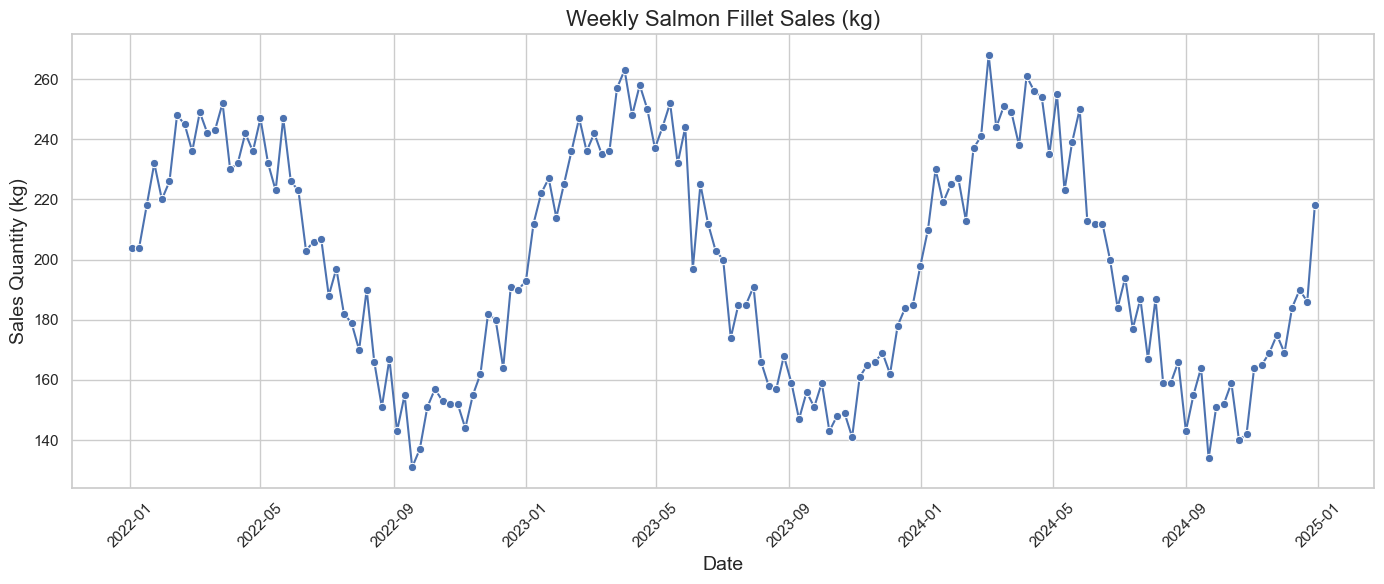

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create line plot for weekly Salmon Fillet sales
plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x='date', y='sales_quantity', marker='o')

# Titles and labels
plt.title('Weekly Salmon Fillet Sales (kg)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Quantity (kg)', fontsize=14)

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()

# Display plot
plt.show()


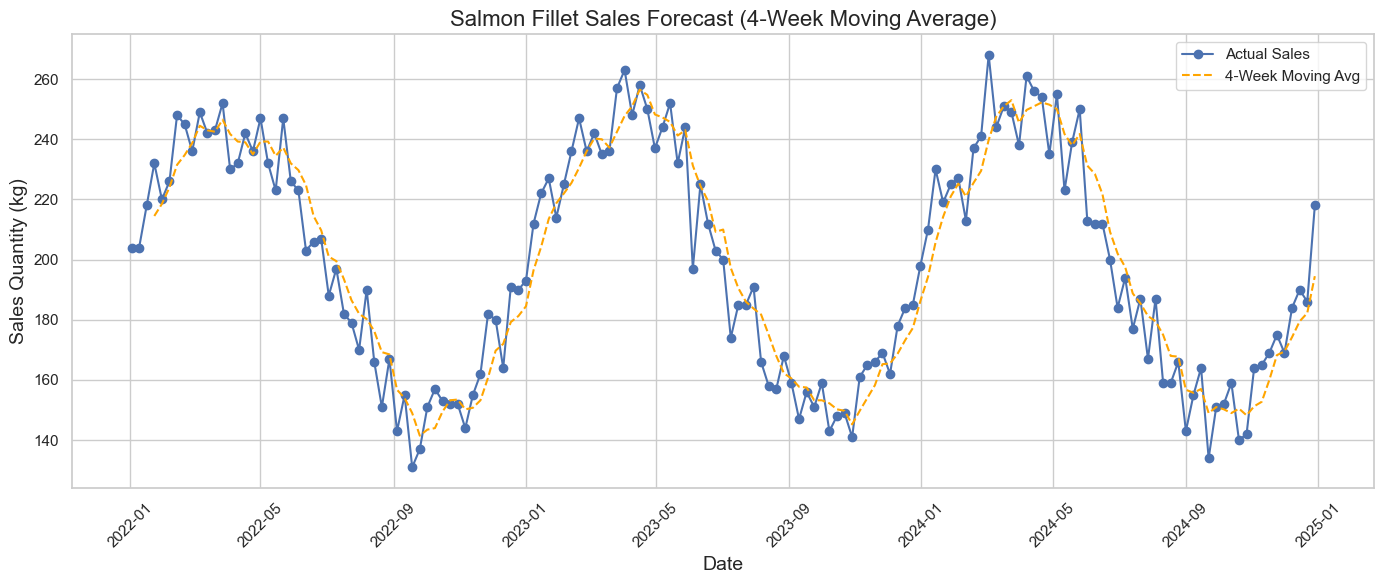

In [78]:
# Calculate 4-week moving average forecast
data['moving_avg'] = data['sales_quantity'].rolling(window=4).mean()

# Plot actual vs moving average
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['sales_quantity'], label='Actual Sales', marker='o')
plt.plot(data['date'], data['moving_avg'], label='4-Week Moving Avg', linestyle='--', color='orange')

# Titles and labels
plt.title('Salmon Fillet Sales Forecast (4-Week Moving Average)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Quantity (kg)', fontsize=14)

# Legend and grid
plt.legend()
plt.grid(True)

# Better layout
plt.xticks(rotation=45)
plt.tight_layout()

# Display plot
plt.show()


In [79]:
%pip install scikit-learn


You should consider upgrading via the 'd:\Projects\AquaForecast\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [80]:
# Import libraries
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for linear regression
data['week_num'] = np.arange(len(data))  # numerical representation of weeks
X = data[['week_num']]
y = data['sales_quantity']


In [81]:
# Initialize and fit model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
data['predicted_sales'] = model.predict(X)


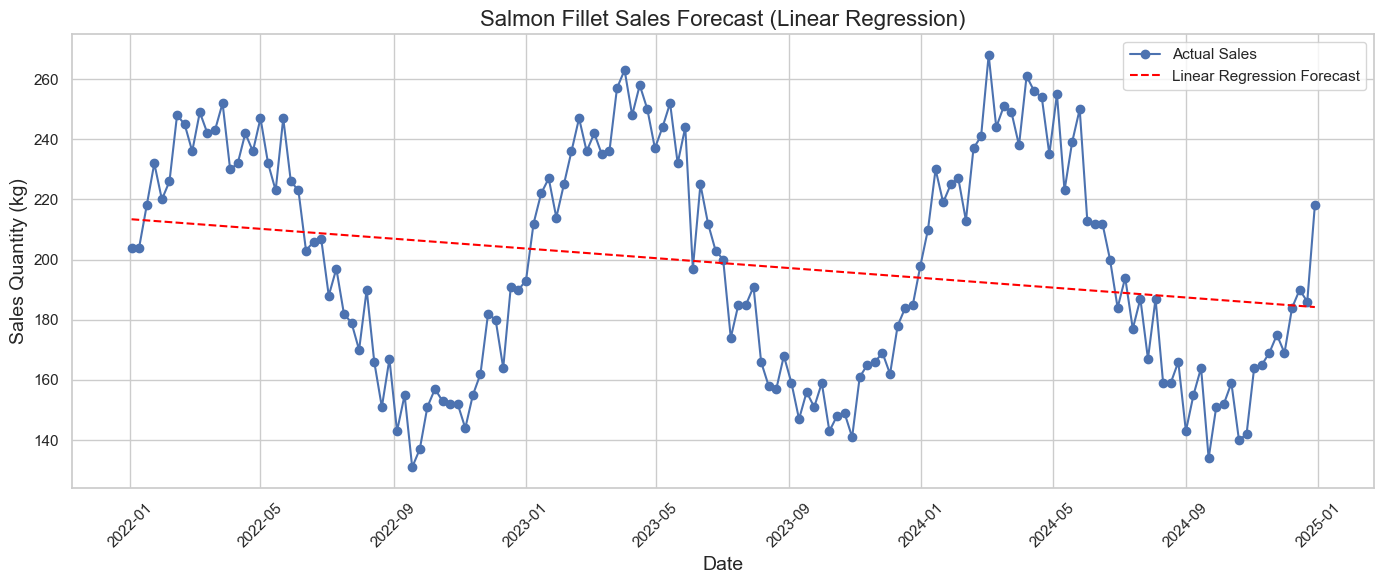

In [82]:
# Plot actual vs predicted sales
plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['sales_quantity'], label='Actual Sales', marker='o')
plt.plot(data['date'], data['predicted_sales'], label='Linear Regression Forecast', linestyle='--', color='red')

# Titles and labels
plt.title('Salmon Fillet Sales Forecast (Linear Regression)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Quantity (kg)', fontsize=14)

# Legend and grid
plt.legend()
plt.grid(True)

# Better layout
plt.xticks(rotation=45)
plt.tight_layout()

# Display plot
plt.show()


In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate accuracy metrics
mae = mean_absolute_error(y, data['predicted_sales'])
mse = mean_squared_error(y, data['predicted_sales'])  # squared=True by default
rmse = np.sqrt(mse)  # manually calculate RMSE
r2 = r2_score(y, data['predicted_sales'])

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² (Coefficient of Determination): {r2:.2f}")


Mean Absolute Error (MAE): 31.39
Root Mean Squared Error (RMSE): 36.24
R² (Coefficient of Determination): 0.05


In [84]:
%pip install prophet


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Projects\AquaForecast\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [85]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = data[['date', 'sales_quantity']].rename(columns={'date': 'ds', 'sales_quantity': 'y'})

# Check data format
prophet_df.head()


,ds,y
0,2022-01-02,204
1,2022-01-09,204
2,2022-01-16,218
3,2022-01-23,232
4,2022-01-30,220


In [86]:
# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

# Fit Prophet model
model.fit(prophet_df)


17:26:35 - cmdstanpy - INFO - Chain [1] start processing
17:26:35 - cmdstanpy - INFO - Chain [1] done processing


In [87]:
# Create future dataframe for predictions (52 weeks ahead)
future = model.make_future_dataframe(periods=52, freq='W')

# Generate forecast
forecast = model.predict(future)

# Preview the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
204,2025-11-30,175.875064,165.569537,186.846400
205,2025-12-07,177.994373,167.049678,188.858728
206,2025-12-14,182.818306,171.064390,193.474609
207,2025-12-21,190.958089,180.365883,202.059448
208,2025-12-28,201.111953,189.758167,212.491424


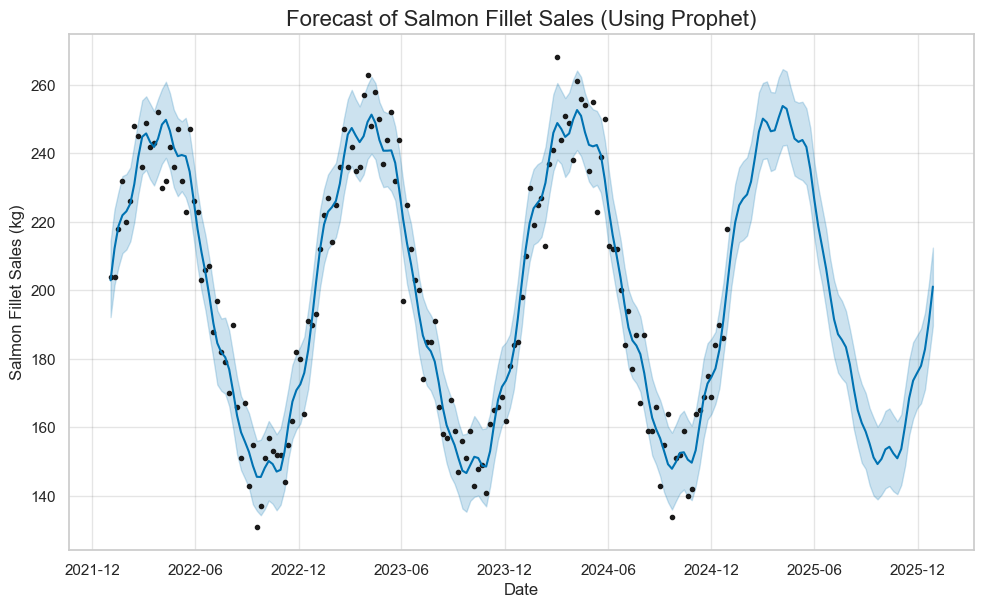

In [88]:
# Plot the forecast results
fig = model.plot(forecast, xlabel='Date', ylabel='Salmon Fillet Sales (kg)')
plt.title('Forecast of Salmon Fillet Sales (Using Prophet)', fontsize=16)
plt.show()


17:26:35 - cmdstanpy - INFO - Chain [1] start processing
17:26:35 - cmdstanpy - INFO - Chain [1] done processing


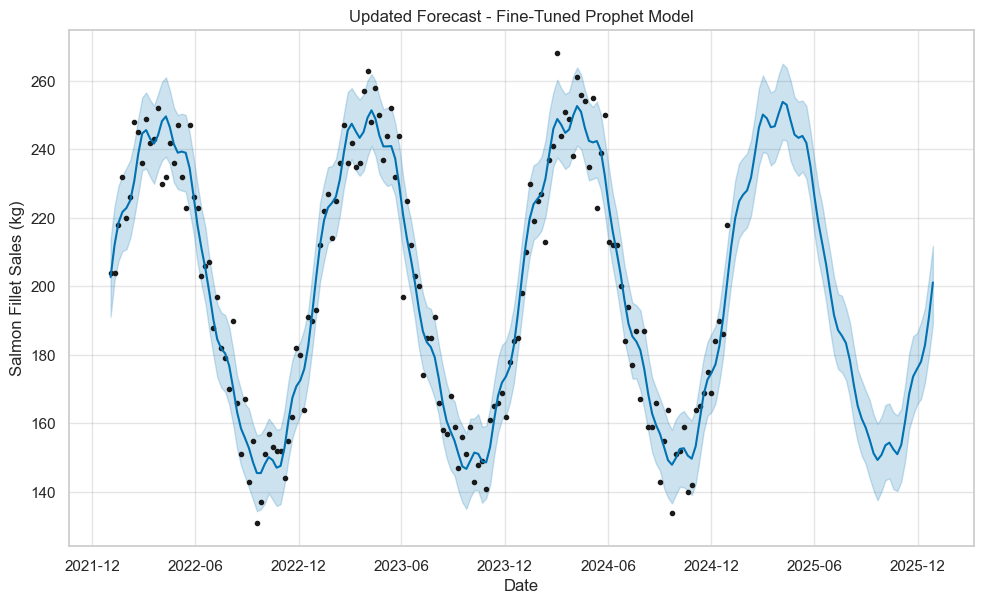

In [89]:
# Reinitialize Prophet model with fine-tuned hyperparameters
model = Prophet(
    yearly_seasonality=True,   # Ensure Prophet recognizes annual sales patterns
    weekly_seasonality=False,  # Not needed for this dataset
    daily_seasonality=False,   # We are working with weekly data
    changepoint_prior_scale=0.1,  # Higher = more flexible trend changes
    seasonality_prior_scale=10.0  # Higher = stronger seasonal effect
)

# Fit the model with our dataset
model.fit(prophet_df)

# Generate a new forecast
future = model.make_future_dataframe(periods=52, freq='W')
forecast = model.predict(future)

# Plot updated forecast
fig = model.plot(forecast, xlabel='Date', ylabel='Salmon Fillet Sales (kg)')
plt.title('Updated Forecast - Fine-Tuned Prophet Model')
plt.show()


In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compare actual vs predicted sales for known historical data
actual = prophet_df['y']
predicted = forecast['yhat'][:len(actual)]  # Only compare known data points

# Calculate error metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)

print(f"🔹 Mean Absolute Error (MAE): {mae:.2f} kg")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f} kg")
print(f"🔹 R² (Explained Variance): {r2:.2f}")


🔹 Mean Absolute Error (MAE): 7.09 kg
🔹 Root Mean Squared Error (RMSE): 8.64 kg
🔹 R² (Explained Variance): 0.95


17:26:36 - cmdstanpy - INFO - Chain [1] start processing
17:26:36 - cmdstanpy - INFO - Chain [1] done processing


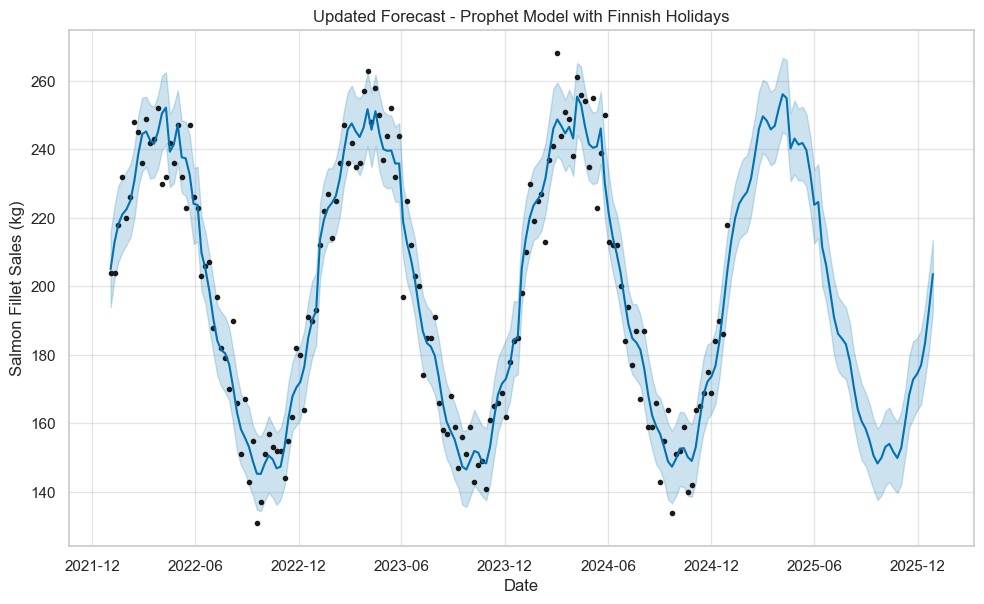

In [91]:
# Reinitialize Prophet model with holiday effects
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0  # Strength of holiday effects
)

# Add Finnish national holidays
model.add_country_holidays(country_name='FI')

# Fit the model again
model.fit(prophet_df)

# Generate a new forecast with holidays
future = model.make_future_dataframe(periods=52, freq='W')
forecast = model.predict(future)

# Plot updated forecast with holidays
fig = model.plot(forecast, xlabel='Date', ylabel='Salmon Fillet Sales (kg)')
plt.title('Updated Forecast - Prophet Model with Finnish Holidays')
plt.show()


In [92]:
# Display holidays that Prophet added
model.train_holiday_names


0              New Year's Day
1                    Epiphany
2                 Good Friday
3               Easter Sunday
4               Easter Monday
5                     May Day
6               Ascension Day
7                 Whit Sunday
8               Midsummer Eve
9               Midsummer Day
10            All Saints' Day
11           Independence Day
12              Christmas Eve
13              Christmas Day
14    Second Day of Christmas
dtype: object

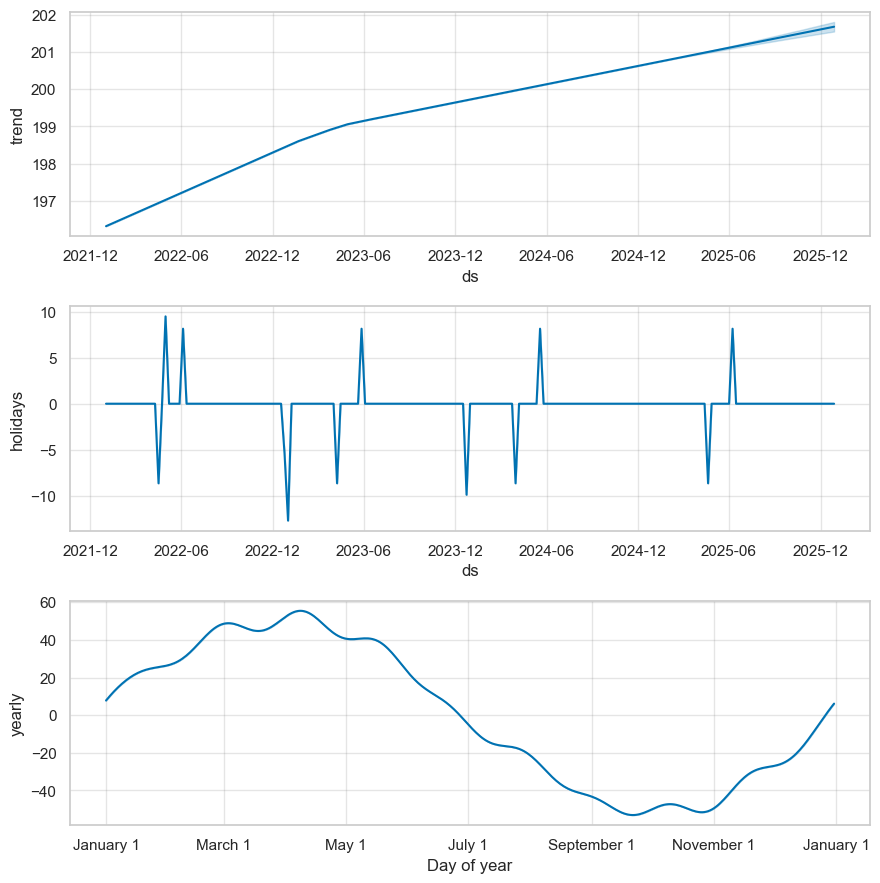

In [93]:
# Plot seasonal components including holiday effects
model.plot_components(forecast)
plt.show()


In [94]:
# Compare actual vs predicted sales for known historical data
actual = prophet_df['y']
predicted = forecast['yhat'][:len(actual)]  # Only compare known data points

# Calculate error metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)

print(f"🔹 Mean Absolute Error (MAE): {mae:.2f} kg")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f} kg")
print(f"🔹 R² (Explained Variance): {r2:.2f}")


🔹 Mean Absolute Error (MAE): 6.77 kg
🔹 Root Mean Squared Error (RMSE): 8.41 kg
🔹 R² (Explained Variance): 0.95


In [95]:
import pandas as pd
import numpy as np
from random import choice, randint
from pathlib import Path

# Define date range
dates = pd.date_range(start='2022-01-01', end='2024-12-31', freq='W')

# Define product categories
salmon_cuts = ["A", "B", "C", "D", "E", "F"]
salmon_sizes = ["1-2kg", "2-3kg", "3-4kg", "4-5kg", "5-6kg", "6-7kg", "7-8kg", "8-9kg"]
other_products = ["Trout Fillet", "Cod Fillet", "Shrimp", "Herring"]

# Generate synthetic sales data
np.random.seed(42)
data = []

for date in dates:
    # Salmon Fillet variations
    for cut in salmon_cuts:
        for size in salmon_sizes:
            base_sales = 50 + 30 * np.sin(2 * np.pi * (date.month / 12))  # Seasonal variation
            noise = np.random.normal(0, 10)  # Random fluctuation
            sales_quantity = max(int(base_sales + noise + randint(-5, 5)), 5)  # Ensure positive values
            data.append([date, "Salmon Fillet", cut, size, sales_quantity])

    # Other products (without cut types/sizes)
    for product in other_products:
        base_sales = 100 + 50 * np.sin(2 * np.pi * (date.month / 12))  # Seasonal effect
        noise = np.random.normal(0, 20)
        sales_quantity = max(int(base_sales + noise + randint(-10, 10)), 10)
        data.append([date, product, None, None, sales_quantity])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["date", "product", "cut_type", "size", "sales_quantity"])

# Define the correct save location
output_dir = Path("D:/Projects/AquaForecast/data")
output_dir.mkdir(parents=True, exist_ok=True)  # Ensure the directory exists
output_path = output_dir / "synthetic_AquaForecast_sales.csv"

# Save to CSV
df.to_csv(output_path, index=False)

print(f"✅ Synthetic dataset saved at: {output_path}")



✅ Synthetic dataset saved at: D:\Projects\AquaForecast\data\synthetic_AquaForecast_sales.csv


In [96]:
import pandas as pd

# Load the synthetic dataset
df = pd.read_csv("D:/Projects/AquaForecast/data/synthetic_AquaForecast_sales.csv")

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Aggregate total sales across all products per week
df_aggregated = df.groupby("date")["sales_quantity"].sum().reset_index()

# Save the aggregated dataset for forecasting
aggregated_path = "D:/Projects/AquaForecast/data/aggregated_sales.csv"
df_aggregated.to_csv(aggregated_path, index=False)

print(f"✅ Aggregated dataset saved at: {aggregated_path}")


✅ Aggregated dataset saved at: D:/Projects/AquaForecast/data/aggregated_sales.csv


17:26:38 - cmdstanpy - INFO - Chain [1] start processing
17:26:38 - cmdstanpy - INFO - Chain [1] done processing


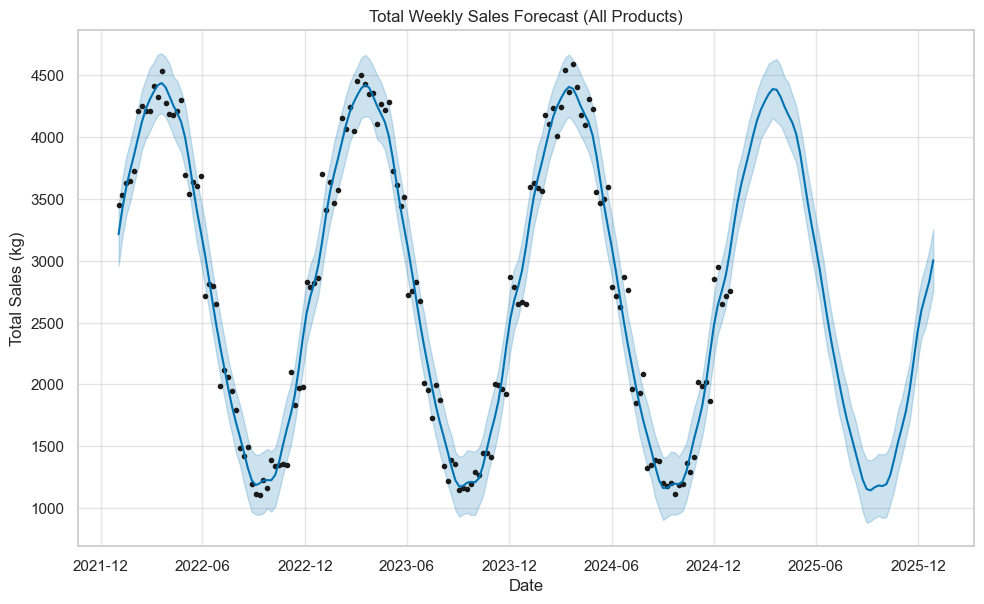

In [97]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Load aggregated dataset
df_aggregated = pd.read_csv("D:/Projects/AquaForecast/data/aggregated_sales.csv")

# Rename columns to match Prophet's required format
df_aggregated = df_aggregated.rename(columns={"date": "ds", "sales_quantity": "y"})

# Initialize and fit Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(df_aggregated)

# Create a future dataframe (52 weeks ahead)
future = model.make_future_dataframe(periods=52, freq='W')

# Generate forecast
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast, xlabel="Date", ylabel="Total Sales (kg)")
plt.title("Total Weekly Sales Forecast (All Products)")
plt.show()
